In [1]:
import pandas
from itertools import product
import sys, argparse, os
import numpy as np
from math import log, ceil
from scipy.stats import multinomial, chi2
from math import factorial
import re

## Biopython - Phylo

In [2]:
from Bio import Phylo

In [3]:
from io import BytesIO     # for handling byte strings
from io import StringIO    # for handling unicode strings

In [4]:
treedata = "(Andex_insignis:0.88489,((Canthyporus_hottentotus:1.43450,((((((((((Heterosternusa_pulcher:2.14201,Hydroporus_fortis:0.02166):0.65409,Hydroporus_axillaris:0.63198):0.00000,((Hydroporus_neglectus:1.07853,Hydroporus_scalesianus:0.83301):0.15218,((Neoporus_arizonicus:1.27684,Neoporus_undulatus:1.01511):0.25633,(Suphrodytes_dorsalis:0.56179,Suphrodytes_figuratus:0.21590):0.40226):0.31090):0.30229):0.04464,(((Hydroporus_appalachius:0.20023,Hydroporus_mannerheimi:0.12852):0.17270,Sanfilippodytes_terminalis:0.91664):0.20285,((((Hydroporus_carri:0.01594,Hydroporus_longiusculus:0.00000):0.48684,Hydroporus_nigellus:0.37304):0.15924,(Hydroporus_lapponum:0.12649,Hydroporus_submuticus:0.05930):0.29198):0.18409,(((Hydroporus_erythrocephalus:0.56960,Hydroporus_obscurus:0.47038):0.35433,Hydroporus_rufifrons:0.54930):0.00087,(Hydroporus_niger:0.28072,Hydroporus_notabilis:0.38240):0.44650):0.12585):0.08013):0.07883):0.10353,Hydrocolus_sahlbergi:1.08298):0.08342,((Hydroporus_sinuatipes:0.08032,Hydroporus_tristis:0.35177):0.35289,Hydroporus_vagepictus:0.33153):0.19816):0.13062,Hydroporus_puberulus:0.98432):0.03671,(Hydroporus_kraatzii:0.46285,Hydroporus_memnonius:0.41284):0.44021):0.12842,(((Hydroporus_nigrita:0.41476,Hydroporus_pubescens:0.60549):0.14125,Hydroporus_pilosus:0.56165):0.00017,Hydroporus_tessellatus:0.60630):0.15117):0.16789,Laccornellus_copelatoides:0.95647):0.04894):0.32400,Hyphydrus_ovatus:1.41331):0.06764,Hovahydrus_minutissimus:1.24682):0.00000;"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")

In [5]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0)
        Clade(branch_length=0.88489, name='Andex_insignis')
        Clade(branch_length=0.06764)
            Clade(branch_length=0.324)
                Clade(branch_length=1.4345, name='Canthyporus_hottentotus')
                Clade(branch_length=0.04894)
                    Clade(branch_length=0.16789)
                        Clade(branch_length=0.12842)
                            Clade(branch_length=0.03671)
                                Clade(branch_length=0.13062)
                                    Clade(branch_length=0.08342)
                                        Clade(branch_length=0.10353)
                                            Clade(branch_length=0.04464)
                                                Clade(branch_length=0.0)
                                                    Clade(branch_length=0.65409)
                                                        Clade(branch_length=2.14201, name='Heterostern

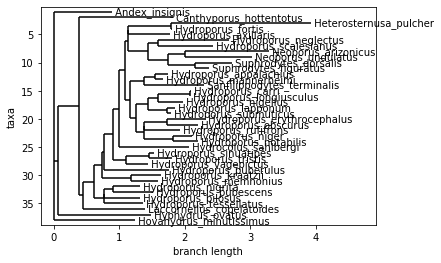

In [6]:
Phylo.draw(tree)

In [7]:
Phylo.draw_ascii(tree)

  _________ Andex_insignis
 |
 |    ________________ Canthyporus_hottentotus
 |   |
 |   |                 _________________________ Heterosternusa_pulcher
 |   |         _______|
 |   |        |       | Hydroporus_fortis
 |   |        |
 |   |        |_______ Hydroporus_axillaris
 |   |        |
 |   |        |      ___________ Hydroporus_neglectus
 |   |        |    _|
 |   |        |   | |________ Hydroporus_scalesianus
 |   |        |   |
 |   |        |___|      _______________ Neoporus_arizonicus
 |   |        |   |   __|
 |   |        |   |  |  |____________ Neoporus_undulatus
 |   |        |   |__|
 |   |        |      |     ______ Suphrodytes_dorsalis
 |   |        |      |____|
 |   |       _|           |__ Suphrodytes_figuratus
 |   |      | |
 |   |      | |     _ Hydroporus_appalachius
 |   |      | |   _|
 |   |      | |__| |_ Hydroporus_mannerheimi
 |   |      | |  |
 |   |      | |  |__________ Sanfilippodytes_terminalis
 |   |      | |
 |   |      | |          , Hydrop

## dendropy

In [43]:
import dendropy
from dendropy.calculate import treecompare

In [8]:
tree1 = dendropy.Tree.get(path="./mytree.nwk", schema="newick")
tree2 = dendropy.Tree.get(path="./mytree2.nwk", schema="newick")

In [9]:
tree1.print_plot()

/------------------------------------------------------------------------------------------------------------------ Andex insignis            
|                                                                                                                                             
|              /--------------------------------------------------------------------------------------------------- Canthyporus hottentotus   
|              |                                                                                                                              
|              |                                                                                           /------- Heterosternusa pulcher    
|              |                                                                                   /-------+                                  
|              |                                                                    /--------------+       \------- Hydroporus fortis         

In [10]:
tree2.print_plot()

/------------------------------------------------------------------------------------------------------------------ Andex insignis            
|                                                                                                                                             
|              /--------------------------------------------------------------------------------------------------- Canthyporus hottentotus   
|              |                                                                                                                              
|              |                                                                                           /------- Heterosternusa pulcher    
|              |                                                                                   /-------+                                  
|              |                                                                    /--------------+       \------- Hydroporus fortis         

In [11]:
tree1.encode_bipartitions()
tree2.encode_bipartitions()

In [26]:
print(treecompare.euclidean_distance(tree1, tree1))

0.0


In [29]:
pdm = tree1.phylogenetic_distance_matrix()

In [30]:
mntd = pdm.mean_nearest_taxon_distance()

In [46]:
pdm.as_data_table(is_weighted_edge_distances=True)

In [53]:
pdm.write_csv('Distance_matrix.csv',
              is_first_row_column_names=False,
              delimiter = "")